In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('world-happiness-report.csv')

In [5]:
df.shape

(1949, 11)

In [6]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
df.describe()
#economic production, social support, life expectancy, freedom, absence of corruption, and generosity 

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [8]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [12]:
df2.duplicated().sum()

0

In [13]:
df2.shape

(1708, 11)

In [14]:
df2.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [17]:
features=df2[['Log GDP per capita',                  
'Social support',                      
'Healthy life expectancy at birth',    
'Freedom to make life choices',        
'Generosity',                          
'Perceptions of corruption'  ]]
features

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.370,0.451,50.80,0.718,0.168,0.882
1,7.540,0.552,51.20,0.679,0.190,0.850
2,7.647,0.539,51.60,0.600,0.121,0.707
3,7.620,0.521,51.92,0.496,0.162,0.731
4,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...
1944,7.984,0.768,54.40,0.733,-0.095,0.724
1945,8.016,0.754,55.00,0.753,-0.098,0.751
1946,8.049,0.775,55.60,0.763,-0.068,0.844
1947,7.950,0.759,56.20,0.632,-0.064,0.831


In [20]:
target=df2['Life Ladder']
target.isnull().sum()

0

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1537, 6) (171, 6)


In [22]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression( ) 
regressor.fit(X_train, Y_train)  

LinearRegression()

In [24]:
y_pred= regressor.predict(X_valid) 
print(np.mean(y_pred-Y_valid))

0.0010054794698844396


In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_valid, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(Y_valid, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_valid, y_pred_knn)))

Mean Absolute Error: 0.4664029911810151
Mean Squared Error: 0.35538729318264156
Root Mean Squared Error: 0.5961436850144783


In [27]:
Y_valid

854     5.880
1583    5.390
1748    4.521
118     4.319
1573    3.661
        ...  
1864    6.600
1317    5.132
1185    4.224
1915    2.983
590     5.164
Name: Life Ladder, Length: 171, dtype: float64

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
p, d, q = 1, 1, 1
model = ARIMA(Y_valid, order=(p, d, q))
res=model.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
years_to_forecast = 4
# Calculate the number of time steps for the specified years
forecast_steps = years_to_forecast *1

In [31]:
forecast = res.forecast(steps=forecast_steps)

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
forecast_dates = pd.date_range(start=df2.index[-1], periods=forecast_steps + 1)
#, closed='right')

ValueError: x and y must have same first dimension, but have shapes (1708,) and (171,)

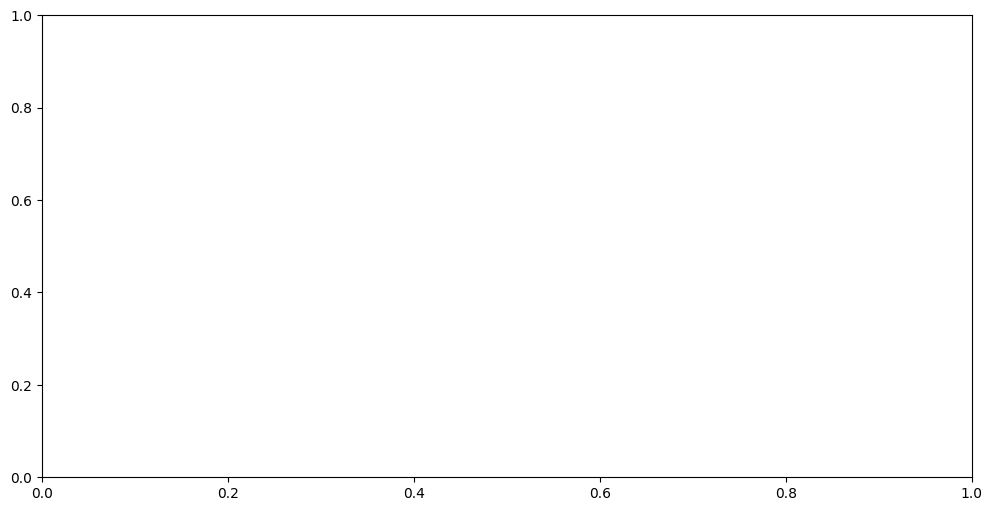

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df2['year'], y_pred_knn, label='Observed')
plt.plot(forecast_dates, np.concatenate((features, forecast)), label='Forecast', color='red')
plt.title('Happiness Index Forecast for {} Years'.format(years_to_forecast))
plt.xlabel('Years')
plt.ylabel('Happiness Index')
plt.legend()
plt.show()
#In this corrected code, I modified the unpacking of the forecast variable to concatenate it with the initial value of the happiness index. This should resolve the "too many values to unpack" error.


In [36]:
forecast

171    5.365015
172    5.409228
173    5.418953
174    5.421092
Name: predicted_mean, dtype: float64

In [37]:
df2['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005], dtype=int64)

In [43]:
data = {'years': [2020,2021,2022,2023]}
df11 = pd.DataFrame(data)
forecast_df=pd.concat([df11,forecast])
forecast_df

,years,0
0,2020.0,NaN
1,2021.0,NaN
2,2022.0,NaN
3,2023.0,NaN
171,NaN,5.365015
172,NaN,5.409228
173,NaN,5.418953
174,NaN,5.421092


In [ ]:
df_2=pd.read_csv('world-happiness-report-2021.csv')
df_2.columns

In [ ]:
df_2['Logged GDP per capita']

In [ ]:
plt.scatter( df_2['Ladder score'],df_2['Regional indicator'])
plt.ylabel('Regional indicator')
plt.xlabel('Ladder score')
plt.title('Scatter Plot')
plt.show()

In [ ]:
plt.scatter( Y_valid,df2['Social support'])
plt.ylabel('Regional indicator')
plt.xlabel('Ladder score')
plt.title('Scatter Plot')
plt.show()

In [ ]:
plt.plot(df2.index[-len(Y_valid):], Y_valid, label='Actual Prices', color='blue')
plt.plot(df2.index[-len(Y_valid):], y_pred_knn, label='Predicted Prices', color='red')